In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
df_era5 = pd.read_csv('data/era5-temperature.csv')
df_open = pd.read_csv('data/open-meteo-1980.csv')

In [5]:
df_era5['date'] = pd.to_datetime(df_era5['date'])
df_open['time'] = pd.to_datetime(df_open['time'])

In [8]:
print(df_era5)
print(df_open)

            date  min_temp
0     1980-01-01       6.2
1     1980-01-02       3.0
2     1980-01-03       4.6
3     1980-01-04       3.6
4     1980-01-05      -0.1
...          ...       ...
16705 2025-10-08      13.8
16706 2025-10-09      12.6
16707 2025-10-10      11.8
16708 2025-10-11      11.4
16709 2025-10-12      10.3

[16710 rows x 2 columns]
            time  temperature_2m_min (°C)
0     1980-01-01                      2.9
1     1980-01-02                      0.1
2     1980-01-03                      2.1
3     1980-01-04                      0.9
4     1980-01-05                     -1.5
...          ...                      ...
16717 2025-10-08                     11.0
16718 2025-10-09                      9.6
16719 2025-10-10                      9.0
16720 2025-10-11                      7.9
16721 2025-10-12                      7.4

[16722 rows x 2 columns]


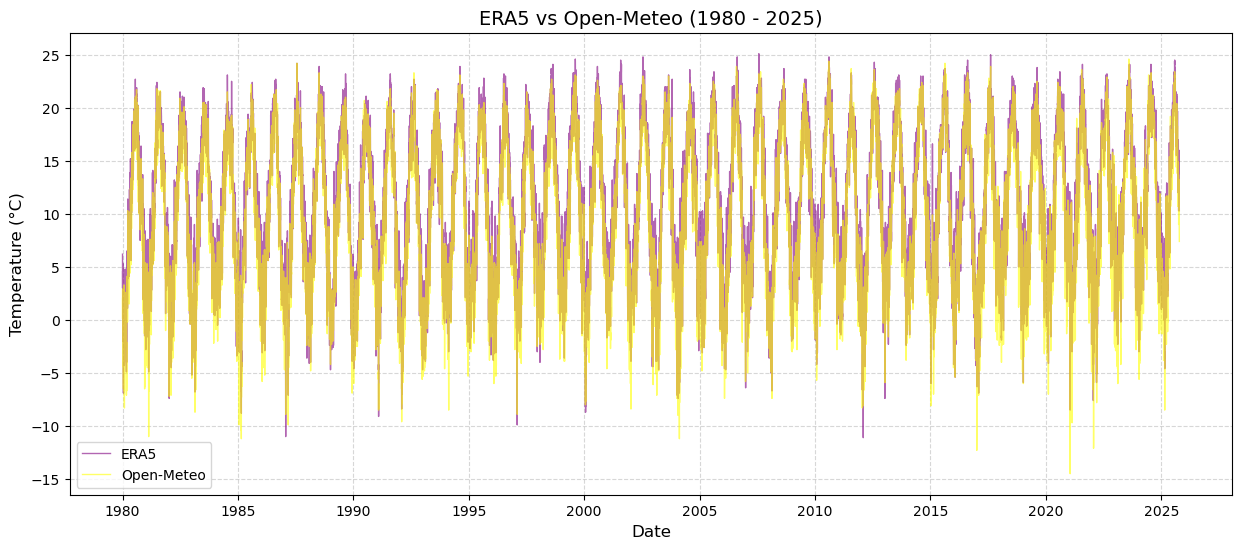

In [12]:
plt.figure(figsize=(15, 6))

plt.plot(df_era5['date'], df_era5['min_temp'],
         label='ERA5', color='purple', alpha=0.6, linewidth=1)

plt.plot(df_open['time'], df_open['temperature_2m_min (°C)'],
         label='Open-Meteo', color='yellow', alpha=0.6, linewidth=1)

plt.title('ERA5 vs Open-Meteo (1980 - 2025)', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Temperature', fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)

plt.show()

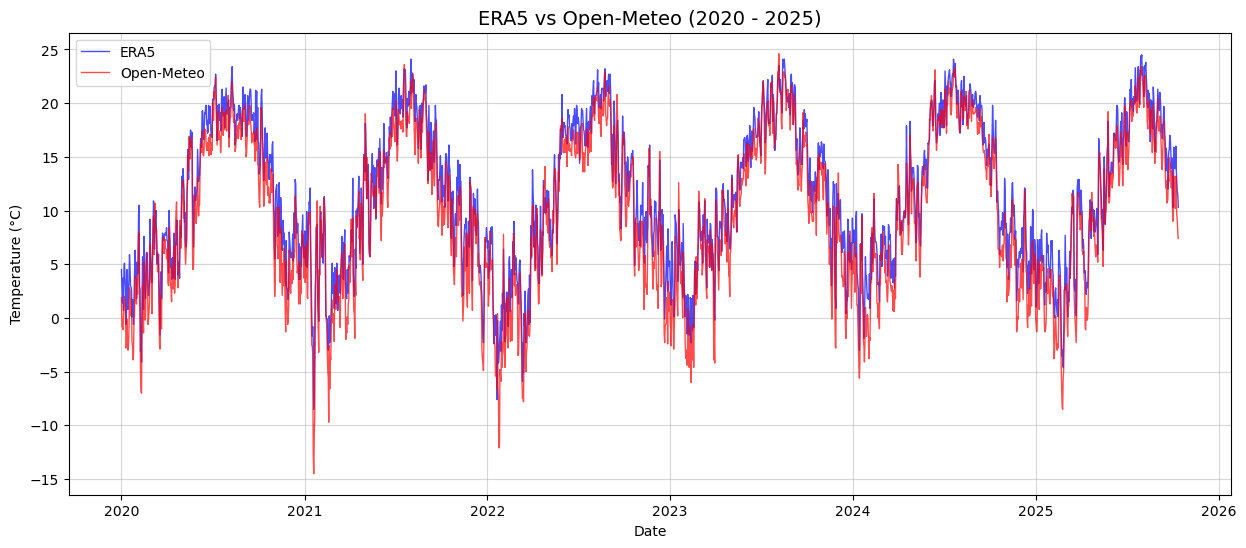

In [14]:
era5_recent = df_era5[df_era5['date'].dt.year >= 2020]
open_recent = df_open[df_open['time'].dt.year >= 2020]

plt.figure(figsize=(15, 6))

plt.plot(era5_recent['date'], era5_recent['min_temp'],
         label='ERA5', color='blue', alpha=0.7, linewidth=1)

plt.plot(open_recent['time'], open_recent['temperature_2m_min (°C)'],
         label='Open-Meteo', color='red', alpha=0.7, linewidth=1)

plt.title('ERA5 vs Open-Meteo (2020 - 2025)', fontsize=14)
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.legend()
plt.grid(True, alpha=0.5)

plt.show()

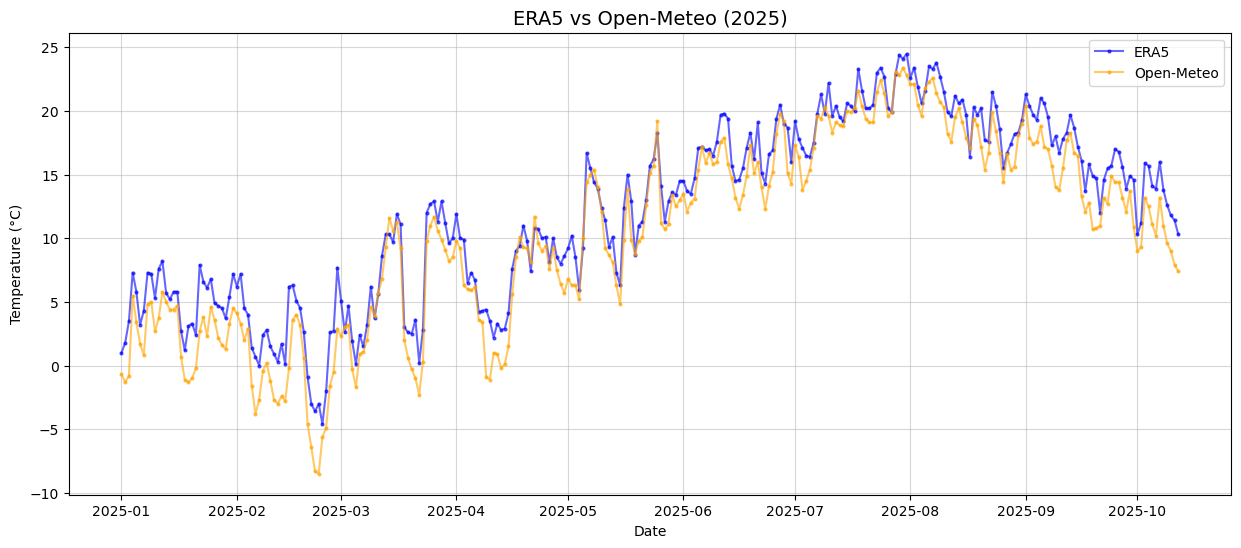

In [15]:
era5_2025 = df_era5[df_era5['date'].dt.year == 2025]
open_2025 = df_open[df_open['time'].dt.year == 2025]

plt.figure(figsize=(15, 6))

plt.plot(era5_2025['date'], era5_2025['min_temp'],
         label='ERA5', color='blue', alpha=0.6, marker='.', markersize=4)

plt.plot(open_2025['time'], open_2025['temperature_2m_min (°C)'],
         label='Open-Meteo', color='orange', alpha=0.6, marker='.', markersize=4)

plt.title('ERA5 vs Open-Meteo (2025)', fontsize=14)
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.legend()
plt.grid(True, alpha=0.5)

import matplotlib.dates as mdates
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())

plt.show()

In [19]:
merged_2025 = pd.merge(era5_2025, open_2025, left_on='date', right_on='time', how='inner')

merged_2025['absolute_diff'] = (merged_2025['min_temp'] - merged_2025['temperature_2m_min (°C)']).abs()

mean_diff = merged_2025['absolute_diff'].mean()
max_diff = merged_2025['absolute_diff'].max()

print(f"Mean Absolute Difference: {mean_diff:.2f}")
print(f"\nMax Difference: {max_diff:.2f}")

day_crit = merged_2025.loc[merged_2025['absolute_diff'].idxmax()]
print(f"{day_crit['date'].date()}: ERA5-> {day_crit['min_temp']} | Open-Meteo-> {day_crit['temperature_2m_min (°C)']}")

Mean Absolute Difference: 1.87 °C

Max Difference: 6.40 °C
2025-02-15: ERA5-> 6.2 | Open-Meteo-> -0.2
